In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import simps
from scipy.stats import trapezoid
from numpy.random import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

class ROC():
    TPr = []
    FPr = []
    
 ### PART A
    #Parametric constructor
    def __init__(self, Probs, TrueClass):
        #class probabilities of P positive and N negative test instances
        self.Probs = Probs
        #true class labels of N test instances
        self.TrueClass = TrueClass
       
        
### PART B
    def compute_ROC_coordinates(self, Probs, TrueClass):
        #computes the TPr and FPr coordinates of the ROC curve 
        #from the positive-class probabilities and true classes of the test instances
        
        #Sort Probs in descreasing order
        Probs = Probs.sort_values(ascending=False)
        #Reorder TrueClass so that the positive-class probability of instance with index i in
        #Probs has the true-class label with index i in TrueClass
        TrueClass = TrueClass.reindex(Probs.index)
        
        #(TPr, FPr) coordinates of ROC curve
        ROC_coordinates = []
        
        FP = 0
        TP = 0
        Previos_Prob = float('-inf')

        N = TrueClass.value_counts()['tested_negative'] #row of negatives
        P = TrueClass.value_counts()['tested_positive'] #row of positives
        
        for i in range(len(Probs)): # for each i-th instance
            if Probs.iloc[i] != Previos_Prob:
                #Add point (FP/N, TP/P) to ROC_coordinates
                ROC_coordinates.append([FP/N, TP/P])
                
                Previos_Prob = Probs[i]
                
            if TrueClass.iloc[i]['class'] == "tested_positive":
                TP = TP + 1
            else:
                FP = FP + 1
        
            #Add point (FP/N, TP/P) to ROC_coordinates
            ROC_coordinates.append([FP/N, TP/P])
        
        return ROC_coordinates
    
    
### PART C
    def plot_ROC(self, ROC_coordinates):  
    #plots the ROC curve
    
        for i in range(len(ROC_coordinates)):
            self.FPr.append(ROC_coordinates[i][0])
            self.TPr.append(ROC_coordinates[i][1])
            
        plt.plot(self.FPr, self.TPr, label='ROC')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
        
### PART D
    def compute_AUCROC(self):
    # computes the area under curve (AUC) of the ROC curve 
    # from the positive-class probabilities and true classes 
    # of the test instances
        area = scipy.integrate.trapezoid(self.TPr, self.FPr)
        return area
            

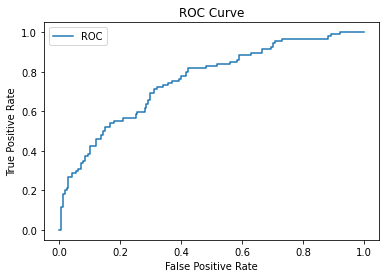

Area under the curve:


0.7574721377912867

In [2]:
### PART E

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import simps
from scipy.stats import trapezoid
from numpy.random import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, Y_train)

Probs = pd.DataFrame(clf.predict_proba(X_test))
Probs = Probs.iloc[:,1] # Keeping only the positive class 


TrueClass = pd.DataFrame(Y_test).reset_index(drop=True)
roc = ROC(Probs, TrueClass)

# ROC_coordinates
ROC_coordinates = roc.compute_ROC_coordinates(Probs, TrueClass)

# plot ROC_coordinates
roc.plot_ROC(ROC_coordinates)

#Area under the curve
print("Area under the curve:")
roc.compute_AUCROC()
